In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

LOADING THE DATA

In [3]:
df = pd.read_csv("churn_bank.csv") #if already in the repo, otherwise use the full path

In [5]:
NRows = df.shape[0]
NColumns = df.shape[1]

In [4]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Who has exited the bank?
Use `.loc` to select columns or rows meeting a condition.

Use `.describe()` to generate descriptive statistics (include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values).

In [6]:
df_exited = df.loc[df["Exited"]==1]
df_exited.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,2037.0,1.569005e+07,72692.623920,15565706.00,15627360.00,15688963.00,15753092.00,15815656.00
CreditScore,2037.0,6.453515e+02,100.321503,350.00,578.00,646.00,716.00,850.00
Age,2037.0,4.483800e+01,9.761562,18.00,38.00,45.00,51.00,84.00
Tenure,2037.0,4.932744e+00,2.936106,0.00,2.00,5.00,8.00,10.00
Balance,2037.0,9.110854e+04,58360.794816,0.00,38340.02,109349.29,131433.33,250898.09
NumOfProducts,2037.0,1.475209e+00,0.801521,1.00,1.00,1.00,2.00,4.00
HasCrCard,2037.0,6.990673e-01,0.458776,0.00,0.00,1.00,1.00,1.00
IsActiveMember,2037.0,3.608247e-01,0.480358,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,2037.0,1.014657e+05,57912.418071,11.58,51907.72,102460.84,152422.91,199808.10
Exited,2037.0,1.000000e+00,0.000000,1.00,1.00,1.00,1.00,1.00


In [7]:
df_not_exited = df.loc[df["Exited"]==0]
df_not_exited.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,7963.0,1.569117e+07,71744.234941,15565701.00,15628818.50,15691543.00,1.575335e+07,15815690.00
CreditScore,7963.0,6.518532e+02,95.653837,405.00,585.00,653.00,7.180000e+02,850.00
Age,7963.0,3.740839e+01,10.125363,18.00,31.00,36.00,4.100000e+01,92.00
Tenure,7963.0,5.033279e+00,2.880658,0.00,3.00,5.00,7.000000e+00,10.00
Balance,7963.0,7.274530e+04,62848.040701,0.00,0.00,92072.68,1.264103e+05,221532.80
NumOfProducts,7963.0,1.544267e+00,0.509536,1.00,1.00,2.00,2.000000e+00,3.00
HasCrCard,7963.0,7.071455e-01,0.455101,0.00,0.00,1.00,1.000000e+00,1.00
IsActiveMember,7963.0,5.545649e-01,0.497045,0.00,0.00,1.00,1.000000e+00,1.00
EstimatedSalary,7963.0,9.973839e+04,57405.586966,90.07,50783.49,99645.04,1.486100e+05,199992.48
Exited,7963.0,0.000000e+00,0.000000,0.00,0.00,0.00,0.000000e+00,0.00


At first sight i don't see huge differences in the summary statistics of both groups. 

In [8]:
gender_count_E = df_exited["Gender"].value_counts()
print("Exited:")
print(gender_count_E) 

gender_count_NE = df_not_exited["Gender"].value_counts()
print("Stayed:")
print(gender_count_NE)



Exited:
Gender
Female    1139
Male       898
Name: count, dtype: int64
Stayed:
Gender
Male      4559
Female    3404
Name: count, dtype: int64


In [9]:
women_perc_E = gender_count_E.values[0]/gender_count_E.values.sum()
print(f"Percentage of women among exited people: {float(women_perc_E)}")

women_perc_NE = gender_count_NE.values[0]/gender_count_NE.values.sum()
print(f"Percentage of women among people who stayed: {float(women_perc_NE)}")

Percentage of women among exited people: 0.5591556210112911
Percentage of women among people who stayed: 0.5725229184980535


Nothing significative in the gender gap? 

(Also sarah if you see this and see that im making rookie mistakes please dont hesitate to correct me)

# Q1

What is the churn rate among the bank's customers?

`nunique`: count number of distinct elements in specified axis.


In [10]:
# getting total number of customers
tot_customer = df["CustomerId"].nunique()
nbr_churned = df.loc[df["Exited"]==1, "CustomerId"].nunique()

churn_rate = (nbr_churned/tot_customer)*100
print(churn_rate) # around 20%

20.369999999999997


# Q2: How are the different variables (gender, age, geography, etc.) distributed in the dataset?

first, observing the variables:

In [11]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

The categorical variables seem to be Gender, HasCrCard, IsActiveMember, Exited, Geography, NumOfProducts.
The quantitaticve variables seem to be Age, CreditScore, Tenure, Balance, EstimatedSalary. 
What is Geography exactly?

## Categorical variables
### Gender

<Axes: xlabel='Gender', ylabel='proportion'>

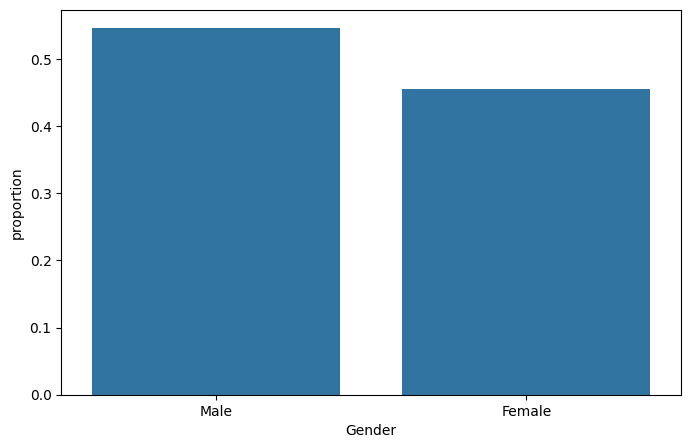

In [13]:
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["Gender"].value_counts().index,
            y = df["Gender"].value_counts(normalize=True))

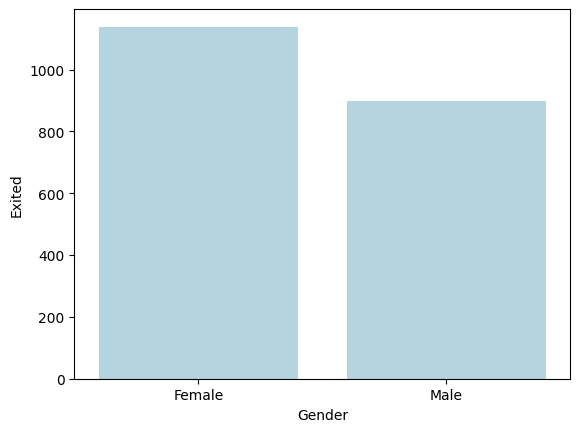

In [14]:
# I wanna find a way to make a stacked barplot, 
# grouped by exiting/satying, 
# but i cant figure it ouuuut
total = df.groupby("Gender")["Exited"].sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="Gender",  y="Exited", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
out = df[df["Exited"]==1]

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="Gender", y="Exited", data=out, estimator=sum, color='lightblue')

# add legend
#top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
#bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
#plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

### Geography

<Axes: xlabel='Geography', ylabel='proportion'>

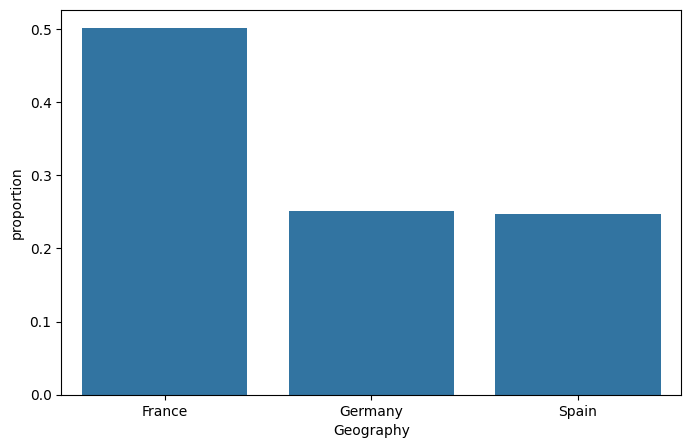

In [15]:
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["Geography"].value_counts().index,
            y = df["Geography"].value_counts(normalize=True)#,
            )

France seem to be where the bank is most expanded, so it is probably the country this bank belongs to. Germany and Spain are probably newer clients of the bank.

It would also be very interesting here to do a stacked barplot to compare who exited and who stayed in each country. If I managed to do a stacked barplot. 

Oh! If i managed to do it, actually, we could even create a loop that does all combinations of stacked barplots for all variables, and we could pick up on the most interesting ones to show!!!

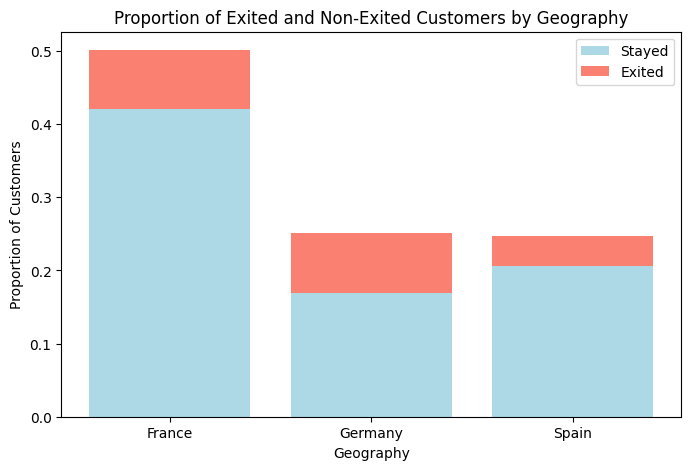

In [17]:
groups_Geo_Exited = df.groupby(['Geography', 'Exited']).size().unstack().div(NRows)

fig, ax = plt.subplots(figsize=(8, 5))

# Plot for Exited == 0 (non-exited) - Bottom layer of the stack
ax.bar(groups_Geo_Exited.index, groups_Geo_Exited[0],
       label='Stayed', color='lightblue'
       )

# Plot for Exited == 1 (exited) - Stacked on top
ax.bar(groups_Geo_Exited.index,
       groups_Geo_Exited[1],
       bottom=groups_Geo_Exited[0],
       label='Exited', color='salmon'
       )

ax.set_xlabel('Geography')
ax.set_ylabel('Proportion of Customers')
ax.set_title('Proportion of Exited and Non-Exited Customers by Geography')
ax.legend()

plt.show()

### Has Credit Card

/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_85946/4140223361.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No", "Yes"])


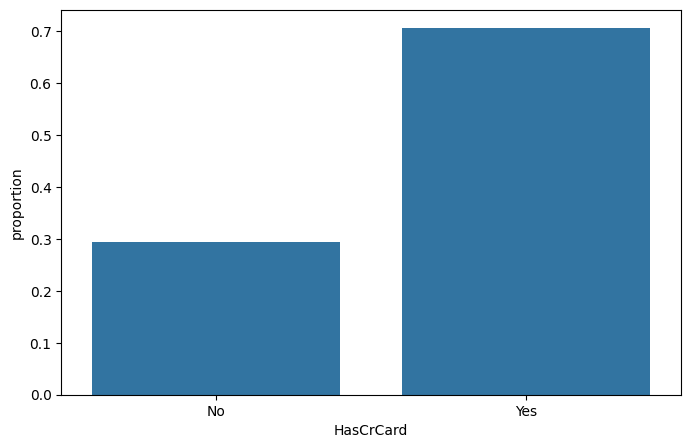

In [22]:
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(
            x = df["HasCrCard"].value_counts().index,
            y = df["HasCrCard"].value_counts(normalize=True)
            )
ax.set_xticklabels(["No", "Yes"])
plt.show()

### Exited

/var/folders/cr/71dt26rx1ljbqzzzxpwv5g6r0000gn/T/ipykernel_85946/1486963109.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No", "Yes"])


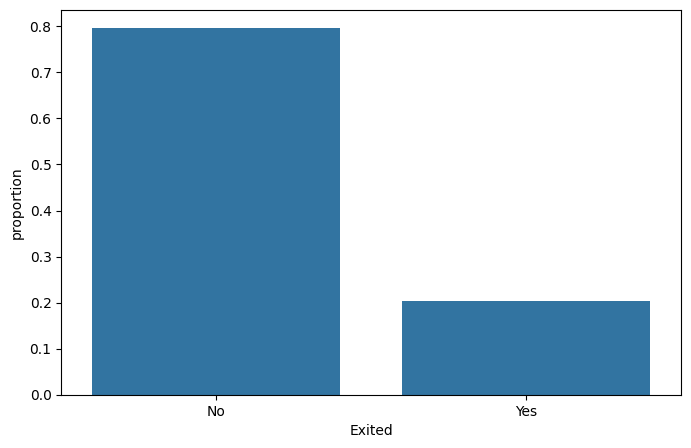

In [19]:
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(
            x = df["Exited"].value_counts().index,
            y = df["Exited"].value_counts(normalize=True)
            )
ax.set_xticklabels(["No", "Yes"])
plt.show()

### Number of Products

## Quantitative variables
The quantitaticve variables seem to be Age, CreditScore, Tenure, Balance, EstimatedSalary. 




### Age

[Text(0.5, 1.0, 'Age distribution (count)'),
 Text(0.5, 0, 'Age (years)'),
 Text(0, 0.5, 'frequency')]

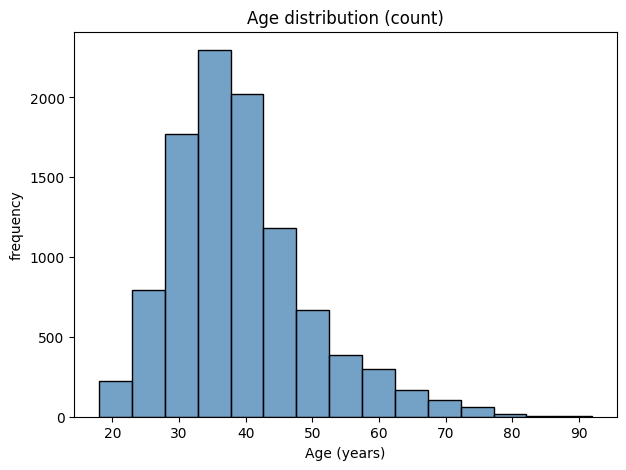

In [71]:
fig, ax = plt.subplots(figsize=[7, 5])

sns.histplot(
    x = df["Age"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True),
    binwidth = 5,
    color="steelblue",
    edgecolor = "black"
)

ax.set(
    title = "Age distribution (count)",
    xlabel = "Age (years)",
    ylabel = "frequency"
)

[Text(0.5, 1.0, 'Age distribution (frequency)'),
 Text(0.5, 0, 'Age (years)'),
 Text(0, 0.5, 'frequency')]

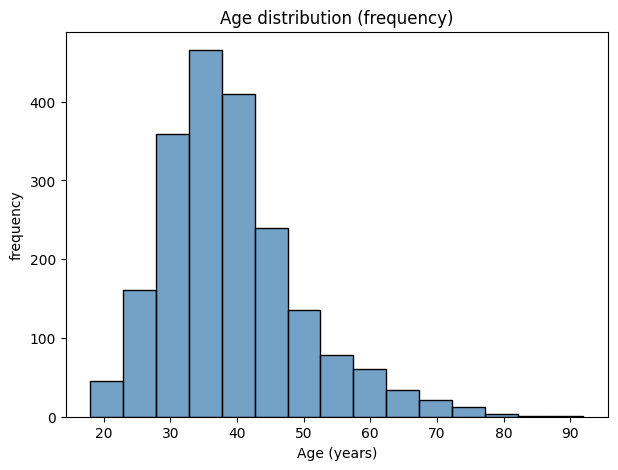

In [21]:
fig, ax = plt.subplots(figsize=[7, 5])

sns.histplot(
    x = df["Age"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True),
    stat = "frequency",
    binwidth = 5,
    color="steelblue",
    edgecolor = "black"
)

ax.set(
    title = "Age distribution (frequency)",
    xlabel = "Age (years)",
    ylabel = "frequency"
)

### CreditScore
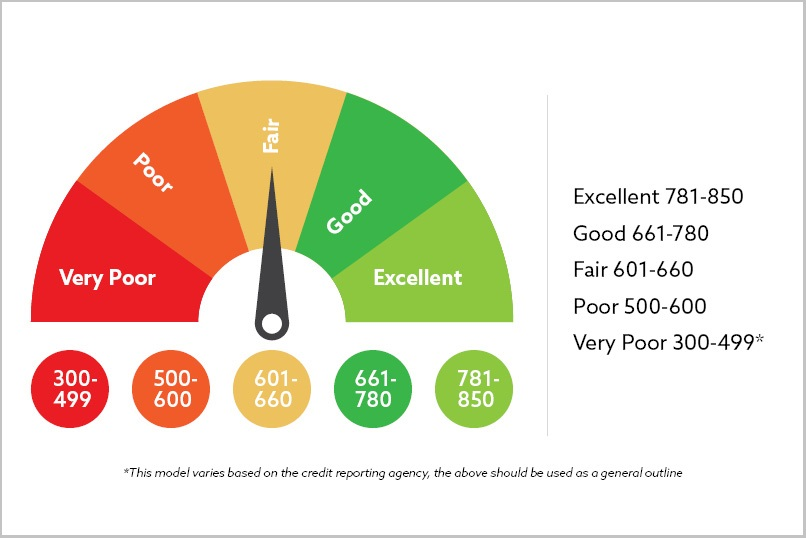

(300.0, 900.0)

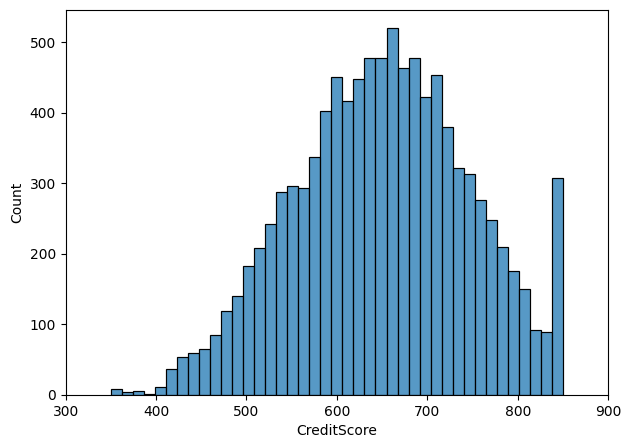

In [62]:
fig, ax = plt.subplots(figsize=[7, 5])

sns.histplot(
    x = df["CreditScore"]
)
plt.xlim([300, 900]) 


(300.0, 900.0)

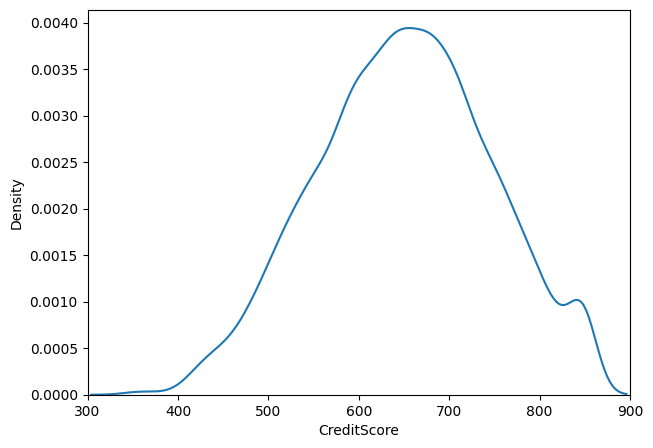

In [63]:
fig, ax = plt.subplots(figsize = [7,5])
sns.kdeplot(x = df["CreditScore"])
plt.xlim([300, 900]) 


In [46]:
# Creating a categorical variable indicating the category of the credit score 
# according to the above image
conditions = [
    (df['CreditScore'] <= 499),
    ((df['CreditScore'] > 499) & (df['CreditScore'] <= 600)),
    ((df['CreditScore'] > 600) & (df['CreditScore'] <= 660)),
    ((df['CreditScore'] > 660) & (df['CreditScore'] <= 780)),
    (df['CreditScore'] > 780)
    ]

values = ['Very poor', 'Poor', 'Fair', 'Good', 'Excellent']

df["CreditScoreCategory"] = np.select(conditions, values, default=df["CreditScore"])
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCategory
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


In [47]:
# making sure there is no outlier
df["CreditScoreCategory"].value_counts()

CreditScoreCategory
Good         3703
Poor         2434
Fair         2281
Excellent     950
Very poor     632
Name: count, dtype: int64

[Text(0.5, 0, 'Credit score'), Text(0, 0.5, 'Proportion')]

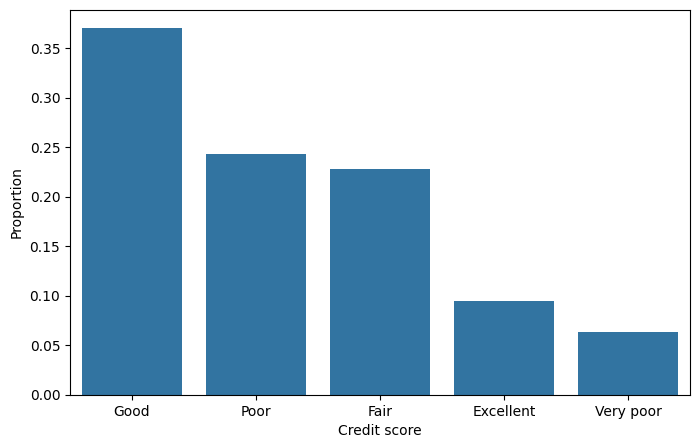

In [49]:
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["CreditScoreCategory"].value_counts().index,
            y = df["CreditScoreCategory"].value_counts(normalize=True)#,
            )

ax.set(
    xlabel = "Credit score",
    ylabel = "Proportion"
)

### Tenure


<Axes: xlabel='count', ylabel='Count'>

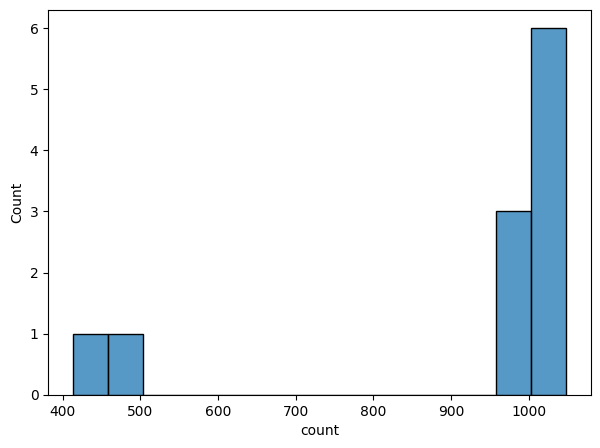

In [70]:
# Figure this one out
fig, ax = plt.subplots(figsize=[7, 5])

sns.histplot(
    x = df["Tenure"].value_counts() 
    #y = df_exited["Age"].value_counts(normalize=True),
)


KeyError: 'tenure'

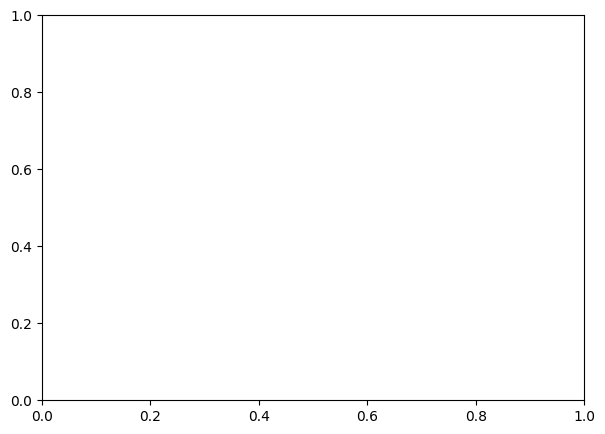

In [66]:
fig, ax = plt.subplots(figsize = [7,5])
sns.kdeplot(x = df["tenure"])

### Balance

<Axes: xlabel='Balance', ylabel='Density'>

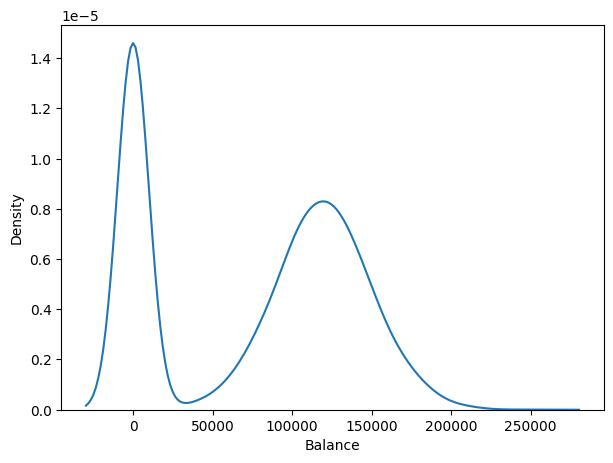

In [75]:
fig, ax = plt.subplots(figsize=[7, 5])

sns.kdeplot(
    x = df["Balance"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True),
)

<Axes: xlabel='NumOfProducts', ylabel='count'>

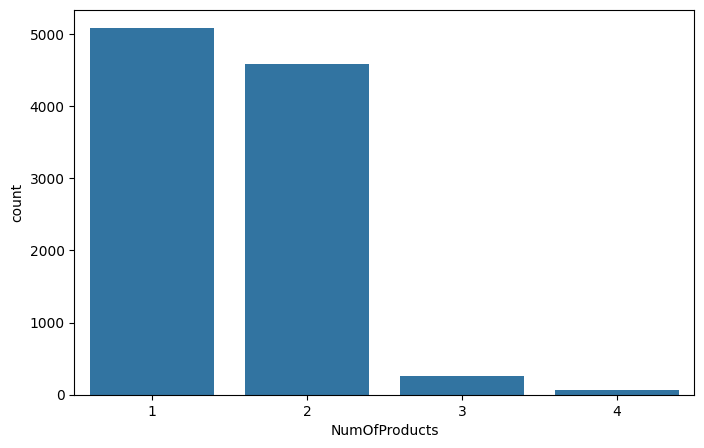

In [86]:
fig, ax = plt.subplots(figsize = (8,5))
sns.barplot(x = df["NumOfProducts"].value_counts().index,
            y = df["NumOfProducts"].value_counts()#,
            #y = df["NumOfProducts"].value_counts(normalize=True)#,
            )

<Axes: xlabel='NumOfProducts', ylabel='Count'>

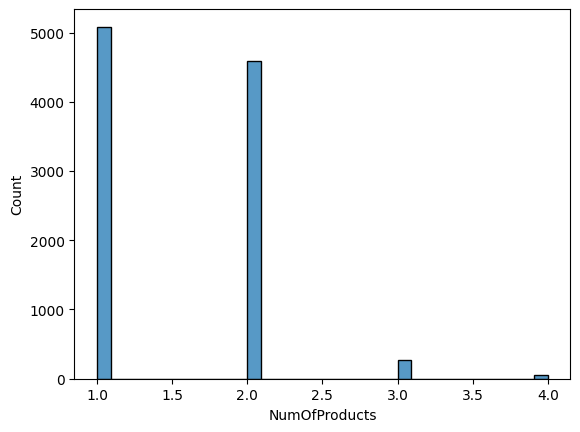

In [82]:
sns.histplot(
    x = df["NumOfProducts"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True),
)

<Axes: xlabel='NumOfProducts'>

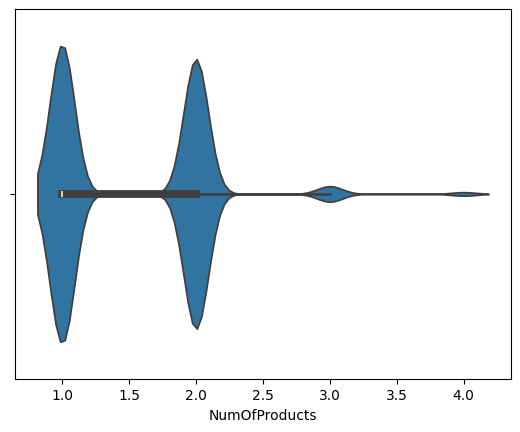

In [ ]:
sns.violinplot(
    x = df["NumOfProducts"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True),
)

### Estimated Salary

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

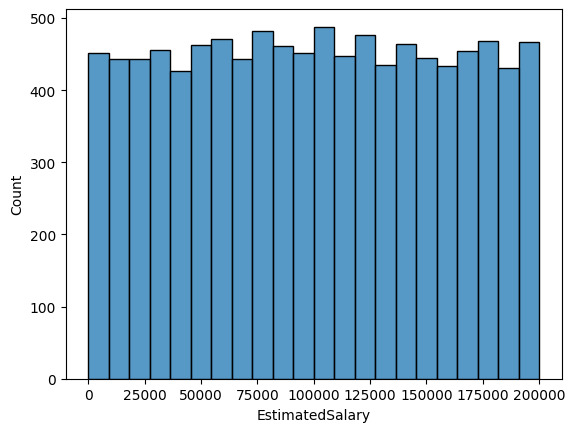

In [80]:
sns.histplot(
    x = df["EstimatedSalary"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True)
)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

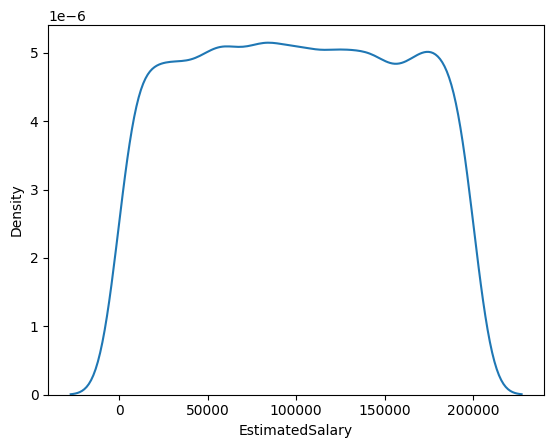

In [87]:
sns.kdeplot(
    x = df["EstimatedSalary"],#.value_counts()), 
    #y = df_exited["Age"].value_counts(normalize=True)
)

Estimated salary seems to be very evenly distributed between 0 and 200000. I think the interpretation is that this is not a bank only for rich people. Which is why it would be interesting to compare the estimated salary for people in certain age categories, for those who exit or dont, or balance and credit score. 